<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Machine Learning 1 Project On Loan Dataset

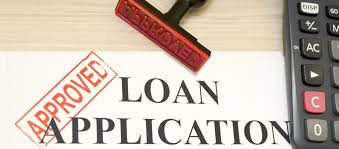

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Install and import python packages](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>  
- 2. [Data Description and Pre-profiling](#section2)</br>
    - 2.1 [Describe Data](#section201)<br/>
    - 2.2 [Data profiling before processing](#section202)<br/>
- 3. [Data Exploration](#section3)</br>
    - 3.1 [Column convertion](#section301)<br/>
    - 3.2 [Handle Missing Data](#section302)<br/>       
- 4. [Exploratory Data Analysis](#section4)</br>
    - 4.1 [Correlation Using Heatmap](#section401)<br/>
    - 4.2 [Relation between Applicant Income And Loan Amount](#section402)<br/>
    - 4.3 [Loan Aplication As Per Gender](#section403)<br/>
    - 4.4 [Loan Request As Per Marital Status](#section404)<br/>
    - 4.5 [Applicant And Co-applicant Income](#section405)<br/>
    - 4.6 [Credit History](#section406)<br/>
    - 4.7 [Property Area As Per Peoples Interest](#section407)<br/>
    - 4.8 [Data Profiling After Processing](#section408)<br/>
- 5. [Data Train/Test Split](#section5)</br>    
- 6. [Training A Model](#section6)</br>     
- 7. [Conclusion](#section7)<br/>

<a id=section1></a>
## 1. Problem Statement

A little background on the case study. This data contain the basic information of a person such as education, income, dependents etc. If he/she go to the different financial institutions for loan request then, as per his/her financial condition we have to predict whether the person is __eligible for taking Loan from Bank.__ 

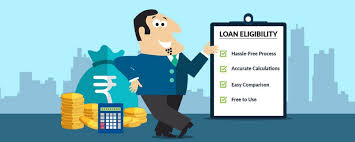

To achieve that, we have decided to use the data from a particular financial institution. The data is given in the file **loans data.csv**.

<a id=section101></a>
### 1.1 Install and import python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\ANIKET\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id=section102></a>
### 1.2 Data Source And Data Set

In [47]:
loan_dt = pd.read_csv('https://raw.githubusercontent.com/RinaMhatre/DataScience-Repository/master/Loan_train_set.csv')
#pd.read_csv('https://raw.githubusercontent.com/RinaMhatre/DataScience-Repository/master/Loan_Dataset.csv')
loan_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_dt.shape

(614, 13)

In [4]:
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- ```info and shape``` functions gives us the following insights into the data:

  - There are a total of **614 samples (rows)** and **13 columns** in the dataset.
  
  - There are **5 columns** with a **numeric** datatype and **8 columns** with an **object** datatype.

<a id=section2></a>
## 2. Data Description and Pre-profiling


__Data profiling is the process of reviewing source data, understanding structure, content and corrrelation between variables.__

Data profiling involves:

- Collecting descriptive statistics like min, max, count and sum.
- Collecting data types, length and recurring patterns.
- Tagging data with keywords, descriptions or categories.
- Performing data quality assessment, risk of performing joins on the data.
- Discovering metadata and assessing its accuracy.
- Identifying distributions, key candidates, foreign-key candidates, functional dependencies, embedded value dependencies, and - performing inter-table analysis.


### 2.1 Describe Data

In [5]:
loan_dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- ```describe``` function gives us the following insights into the data:
  - The distribution of **Monthly.Income** is **positive (right) skewed** because the **mean** of **Monthly.Income (5179.7)** lies to the **right** of the **median(50%)** value **(3800)**, on a **distribution plot**. 
  
  - The **maximum** value of **Monthly.Income** is **81000**, which is clearly an **outlier** because its value is very distant from the **75%** value. 
 

<a id=section202></a>
### 2.2 Pandas Profiling before Data Preprocessing
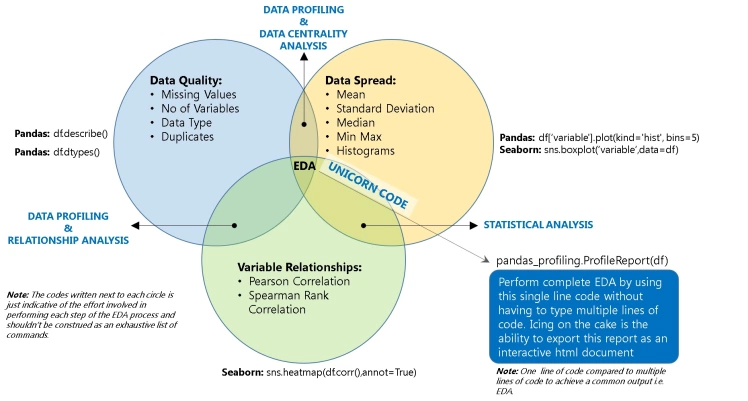

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __LoanData_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


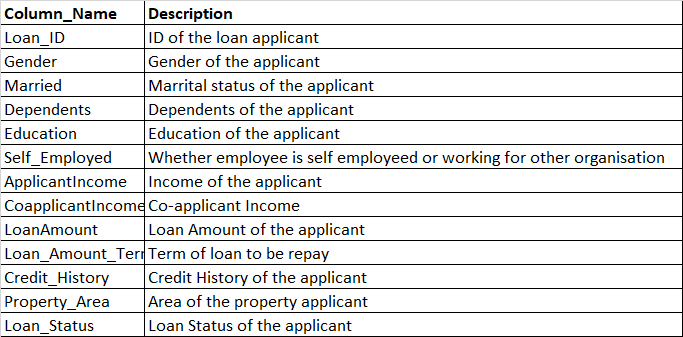

In [6]:
# Performing pandas profiling before data preparation.
# Saving the output as LoanData_before_preprocessing.html

# To output pandas profiling report to an external html file.

profile = loan_dt.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="LoanData_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables	 : 13
- Number of observations : 981
- Missing cells	         : 233
- Missing cells (%)	     : 1.8%


__Variables types__: 
- Categorical :	5
- Numerical	  : 4
- Boolian	  : 4

__Missing Values__:


__Dependent :__
- Missing :	25
- Missing (%) :	2.5%

__Self Employeed :__
- Missing :	55
- Missing (%) :	5.6%

__Credit History :__
- Missing :	79
- Missing (%) :	8.1%

__Loan Amount Term :__
- Missing :	20
- Missing (%) :	2.0%

<a id=section3></a>
## 3.Data Exploration

Since most of the columns in the dataset have missing values and contain data with textual values in them, they can't be used for Statistical Analysis and Data Visualization without performing Data Preprocessing on them.

In [45]:
#report number of missing values for each feature
for col in loan_dt.columns:
    missing_series = loan_dt[col][loan_dt[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)
    plt.show()

LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [8]:
# Dropping ID column from the dataset, as it has a distinct value for each sample, and it won't help our model.
loan_dt.drop(['Loan_ID'],1,inplace=True)

In [9]:
loan_dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id=section301></a>
### 3.1 Column Conversion

In [10]:
round(loan_dt.groupby('Gender')['ApplicantIncome','LoanAmount'].mean())

,ApplicantIncome,LoanAmount
Gender,,
Female,4643.0,127.0
Male,5573.0,151.0


In [11]:
# Creating a dictionary to encode all the different values in Loan.Purpose column to numerical values.

from sklearn.preprocessing import LabelEncoder

lbl_encoder = [x for x in loan_dt.columns if loan_dt[x].dtype=="object"]
le=LabelEncoder()

for col in lbl_encoder:
    if col in loan_dt.columns:
        i = loan_dt.columns.get_loc(col)
        loan_dt.iloc[:,i] = loan_dt.apply(lambda i:le.fit_transform(i.astype(str)), axis=0)

loan_dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [12]:
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


<a id=section302></a>
### 3.2 Handle Missing Data

In [13]:
X = loan_dt.iloc[:, :-1].values
y = loan_dt.iloc[:, -1].values


In [14]:
# The SimpleImputer class also supports categorical data represented as string values or pandas categoricals 
# when using the 'most_frequent' or 'constant' strategy

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit(X[:, 7:8])
X[:, 7:8] = imputer.transform(X[:, 7:8])
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

print(X)


[[  1.   0.   0. ... 360.   1.   2.]
 [  1.   1.   1. ... 360.   1.   0.]
 [  1.   1.   0. ... 360.   1.   2.]
 ...
 [  1.   1.   1. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   1.   2.]
 [  0.   0.   0. ... 360.   0.   1.]]


<a id=section4></a>
## 4.Exploratory Data Analysis

<a id=section401></a>
### 4.1 Correlation Using HeatMap

Text(0.5, 1.0, 'Heatmap To Show Correlation Of Loan Dataset')

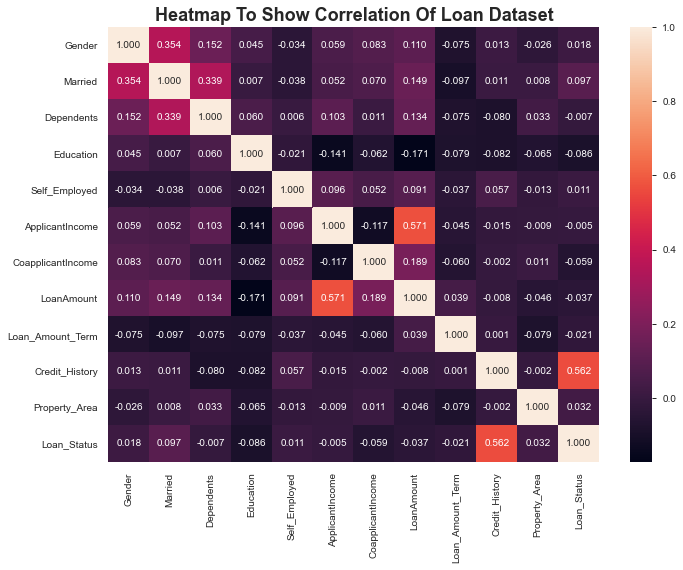

In [15]:
plt.figure(figsize=(11,8))
sns.heatmap(loan_dt.corr(), annot=True, fmt=".3f")
plt.title("Heatmap To Show Correlation Of Loan Dataset", fontsize=18, fontweight = "bold")

#### Observations:

1) Heatmap shows correlation between each variable present in dataset. As per above heatmap darkest colour shows negative correlation between two variable and lighter colour shows positive correlation between two variable.

2) Applicant income and Loan amount is highly correlated.

3) Credit History and Loan status is showing high correlation.

<a id=section402></a>
### 4.2 Relation between Applicant Income And Loan Amount

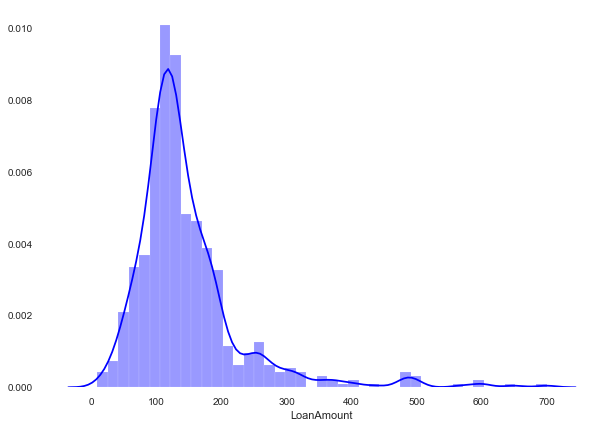

In [16]:
plt.rcParams['figure.figsize']=(10,7)
sns.distplot(loan_dt["LoanAmount"], color="blue")
#plt.title("Loan Request And Income",fontsize=18, fontweight = "bold")
plt.show()

Mostly loan request comming from low salaried people. Graph is little skew to right where income lies between 0 to 9.

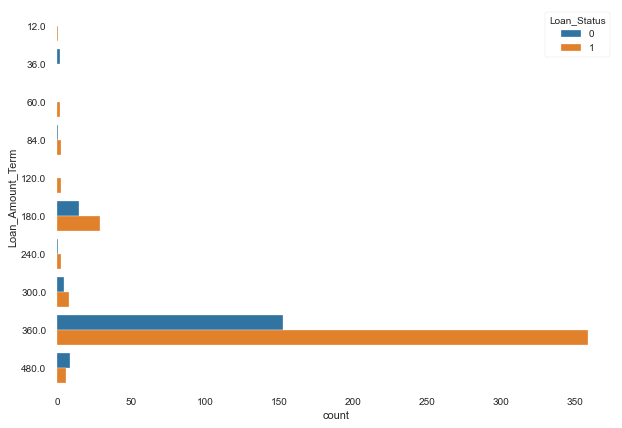

In [17]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=loan_dt)

An extreamly high number of Loan go for a 360 cyclic loan term. Thats pay back within a year.

<a id=section403></a>
### 4.3 Loan Application As Per Gender

Text(0.5, 1.0, 'Boxplot for Gender Vs Loan')

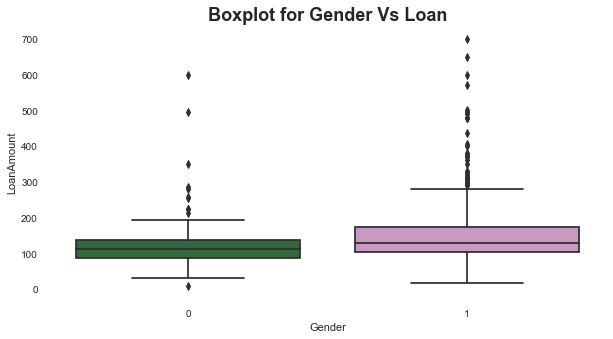

In [18]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(x="Gender", y="LoanAmount", palette="cubehelix", data=loan_dt)
plt.title("Boxplot for Gender Vs Loan", fontsize=18, fontweight="bold")

Loan requets from Male is more

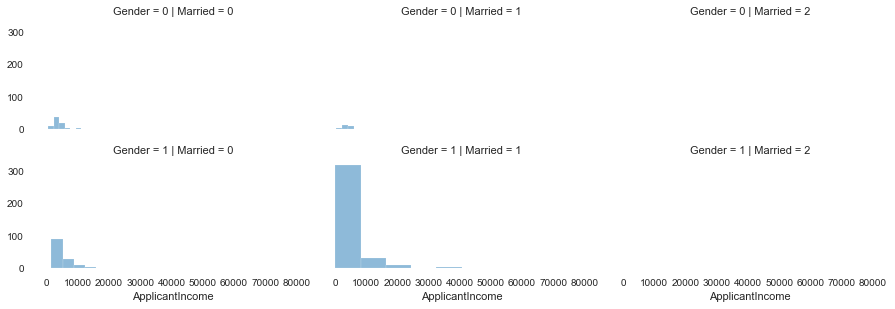

In [19]:
grid = sns.FacetGrid(loan_dt,row='Gender', col='Married', size=2.2, aspect=1.9)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)

<a id=section404></a>
### 4.4 Loan Request As Per Marital Status 

Text(0.5, 1.0, 'Pie chart for customers as per marital status requested for loan')

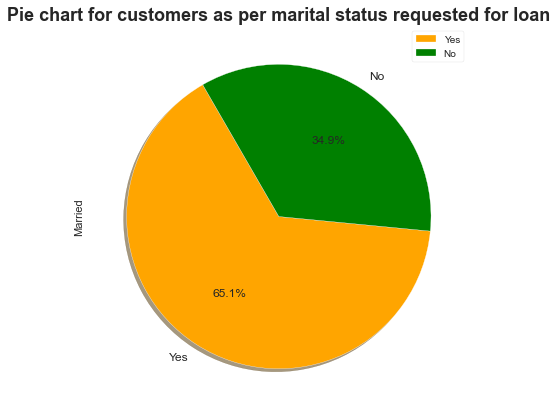

In [48]:
colors = ["orange","green","Red"]
loan_dt["Married"].value_counts().plot.pie(figsize=(7,7), colors=colors, fontsize=12, autopct='%0.1f%%', 
                                                shadow=True, startangle=120, legend=True)
plt.title("Pie chart for customers as per marital status requested for loan", fontsize=18, fontweight = "bold")

As per pie graph percentage of loan requested by married people is more i.e 64.8%.

<a id=section405></a>
### 4.5 Applicant And Co-applicant Income 

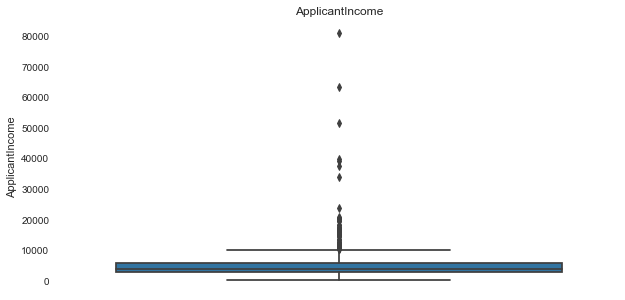

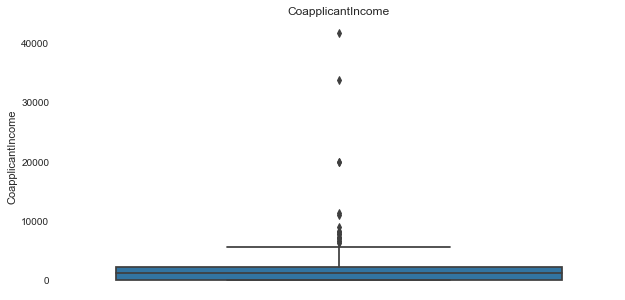

In [21]:
for col in ['ApplicantIncome', 'CoapplicantIncome']:
    sns.boxplot(loan_dt[col], orient = 'v')
    plt.title(col)
    plt.show()


<a id=section406></a>
### 4.6 Credit History

Text(0.5, 1.0, 'Gender wise credit history')

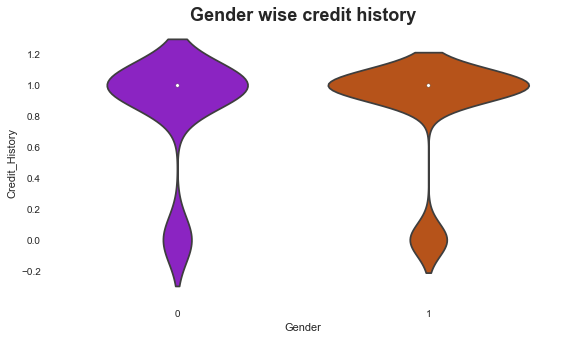

In [22]:
plt.rcParams['figure.figsize']=(9,5)
ax = sns.violinplot(x="Gender", y="Credit_History", palette="gnuplot", data=loan_dt)
plt.xlabel("Gender")
plt.ylabel("Credit_History")
plt.title("Gender wise credit history", fontsize=18, fontweight = "bold")

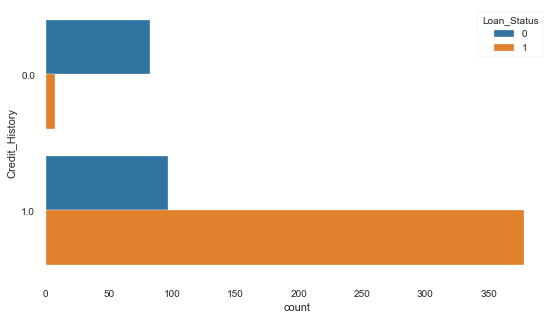

In [23]:
sns.countplot(y = 'Credit_History', hue='Loan_Status', data=loan_dt)

According to the credit history greater number of people paybak their Loans.

<a id=section407></a>
### 4.7 Property Area As Per Peoples Interest

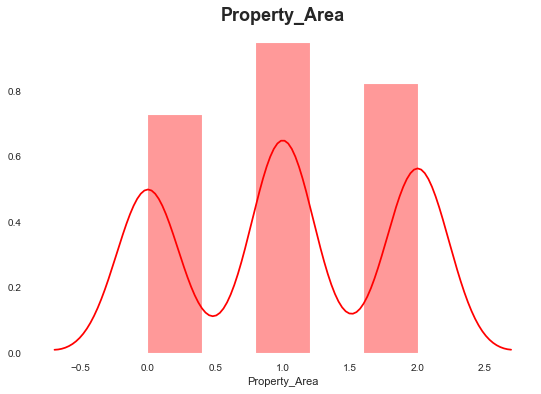

In [24]:
plt.rcParams['figure.figsize']=(9,6)
sns.distplot(loan_dt["Property_Area"], color="Red")
plt.title("Property_Area",fontsize=18, fontweight = "bold")
plt.show()

People would like to invest in the property mostly located in Urban and Semiurban areas

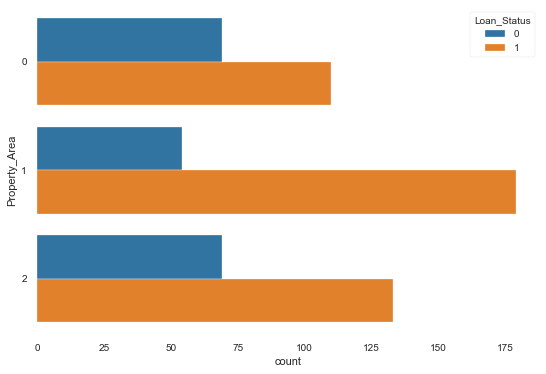

In [25]:
sns.countplot(y = 'Property_Area', hue='Loan_Status', data=loan_dt)



- 0 - Rural
- 1 - Semiurban
- 2 - Urban

Semiurban obtain more loan followed by Urban and then Rural which is Logical.

<a id=section408></a>
### 4.8 Pandas Profiling After Processing

In [26]:
# Performing pandas profiling after data is prepared.
# Saving the output as LoanData_after_preprocessing.html

# To output pandas profiling report to an external html file.

profile = loan_dt.profile_report(title='Pandas Profiling After Data Preprocessing')
profile.to_file(output_file="LoanData_after_preprocessing.html")

<a id=section5></a>
## 5.Data Train-Test-Split
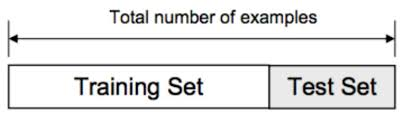

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 5:9] = sc.fit_transform(X_train[:, 5:9])
X_test[:, 5:9] = sc.transform(X_test[:, 5:9])

In [29]:
print(X_train)

[[1.         1.         1.         ... 0.28486204 1.         2.        ]
 [1.         0.         0.         ... 0.28486204 1.         0.        ]
 [1.         0.         2.         ... 0.28486204 1.         0.        ]
 ...
 [1.         1.         3.         ... 0.28486204 1.         1.        ]
 [1.         1.         0.         ... 0.28486204 1.         2.        ]
 [0.         1.         0.         ... 0.28486204 1.         1.        ]]


In [30]:
print(X_test)

[[1.         0.         0.         ... 0.28486204 1.         1.        ]
 [0.         0.         0.         ... 0.28486204 1.         1.        ]
 [1.         1.         0.         ... 0.28486204 1.         2.        ]
 ...
 [1.         1.         0.         ... 0.28486204 1.         2.        ]
 [1.         0.         0.         ... 0.28486204 1.         1.        ]
 [1.         1.         1.         ... 0.28486204 0.         1.        ]]


#### Model Evaluation Using accuracy classification score

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_train = logreg.predict(X_train)  
print(y_pred_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1]


In [33]:
y_pred_test = logreg.predict(X_test)  
print(y_pred_test)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [34]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision:", metrics.precision_score(y_test, y_pred_test))
print("Recall:", metrics.recall_score(y_test, y_pred_test))



Accuracy: 0.8376623376623377
Precision: 0.8257575757575758
Recall: 0.9819819819819819


- Accuracy is 83.76% 
- Precision is 82.57%
- Recall is 98.19% in this cases

<a id=section6></a>
## 6.Training A Model
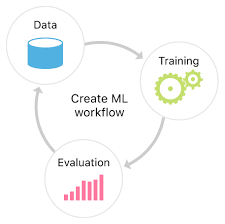

The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

The training data must contain the correct answer, which is known as a target or target attribute. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.

#### Logistic Regression Algorithm

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train,y_train)
print("Logistic Regression\n",classification_report(y_test, LR.predict(X_test)),"\n")
print(accuracy_score(y_test, LR.predict(X_test)),"\n")

Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154
 

0.8376623376623377 



Accuracy score for Logistic Regression is 83.76%

In [36]:
ypred_LR = LR.predict(X_test)
evaluation_LR = f1_score(y_test, ypred_LR)
print(evaluation_LR)

0.897119341563786


f1 score for Logistic regression is 89.71%

#### Decision Tree Algorithm

In [37]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 0 0 0 1 0]


In [39]:
evaluation_tree = f1_score(y_test, ypred_tree)
print(evaluation_tree)

0.8055555555555555


F1 score Decision Tree is 79.46%

In [40]:
print("Decision Tree\n",classification_report(y_test, tree.predict(X_test)),"\n")
print(accuracy_score(y_test, tree.predict(X_test)),"\n")

Decision Tree
               precision    recall  f1-score   support

           0       0.51      0.58      0.54        43
           1       0.83      0.78      0.81       111

    accuracy                           0.73       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.74      0.73      0.73       154
 

0.7272727272727273 



Accuracy score of Decision Tree is 70.12%

#### Random Forest Classifier

In [41]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 0 1 1 0]


In [43]:
evaluation_forest = f1_score(y_test, ypred_forest)
print(evaluation_forest)

0.8533333333333334


In [44]:
print("Random Forest\n",classification_report(y_test, forest.predict(X_test)),"\n")
print(accuracy_score(y_test, forest.predict(X_test)),"\n")

Random Forest
               precision    recall  f1-score   support

           0       0.62      0.58      0.60        43
           1       0.84      0.86      0.85       111

    accuracy                           0.79       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154
 

0.7857142857142857 



<a id=section7></a>
## 7.Conclusion
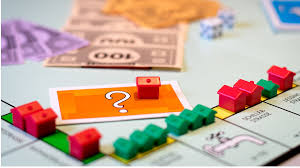


From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of three models that __Logistic Regression__ performed better than others, __Random Forest Classifier__ did better than __Decision Tree__.